In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
a4_dims = (20, 10)

In [2]:
df = pd.read_csv("./call_dataset.csv")

In [3]:
data = df

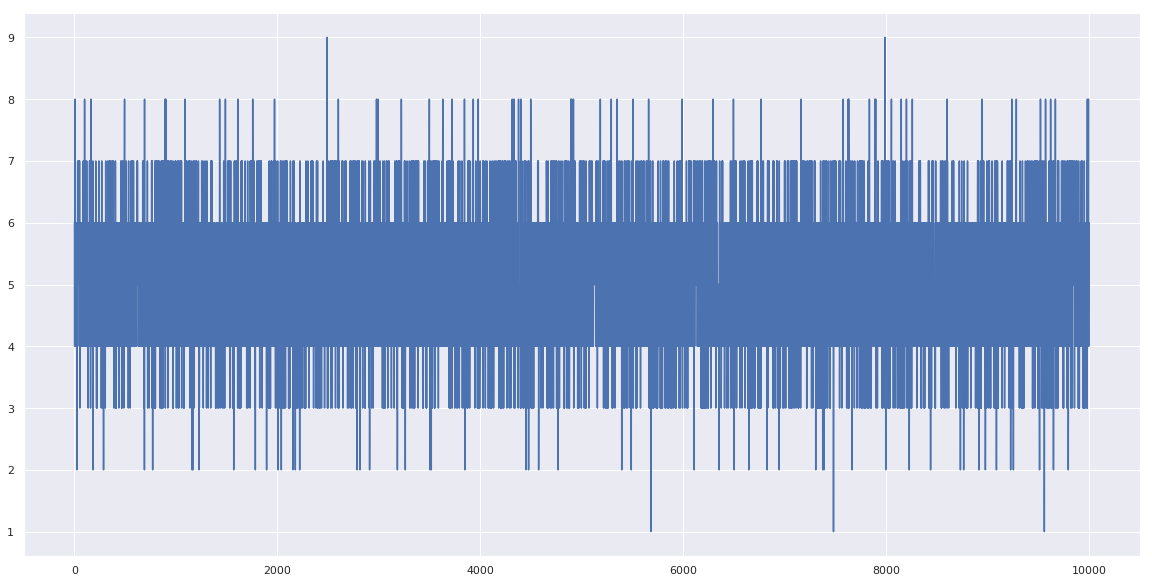

In [65]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(df['Duration of calls'])

In [5]:
df['Duration of calls'].value_counts()

5    3860
6    2620
4    2213
7     646
3     542
8      61
2      53
1       3
9       2
Name: Duration of calls, dtype: int64

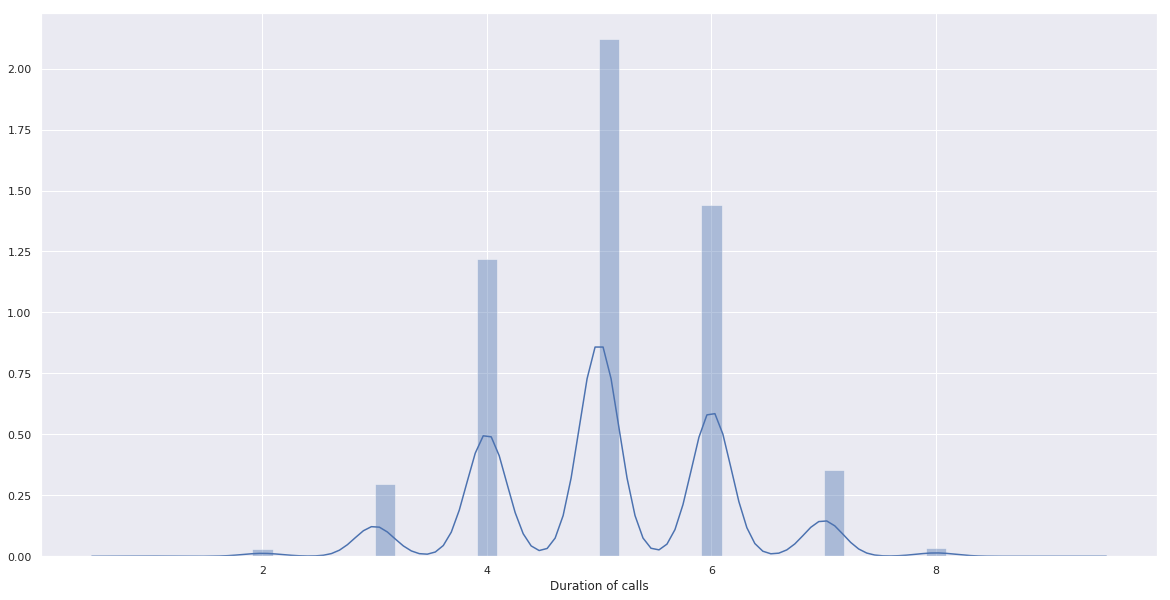

In [6]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df['Duration of calls'])

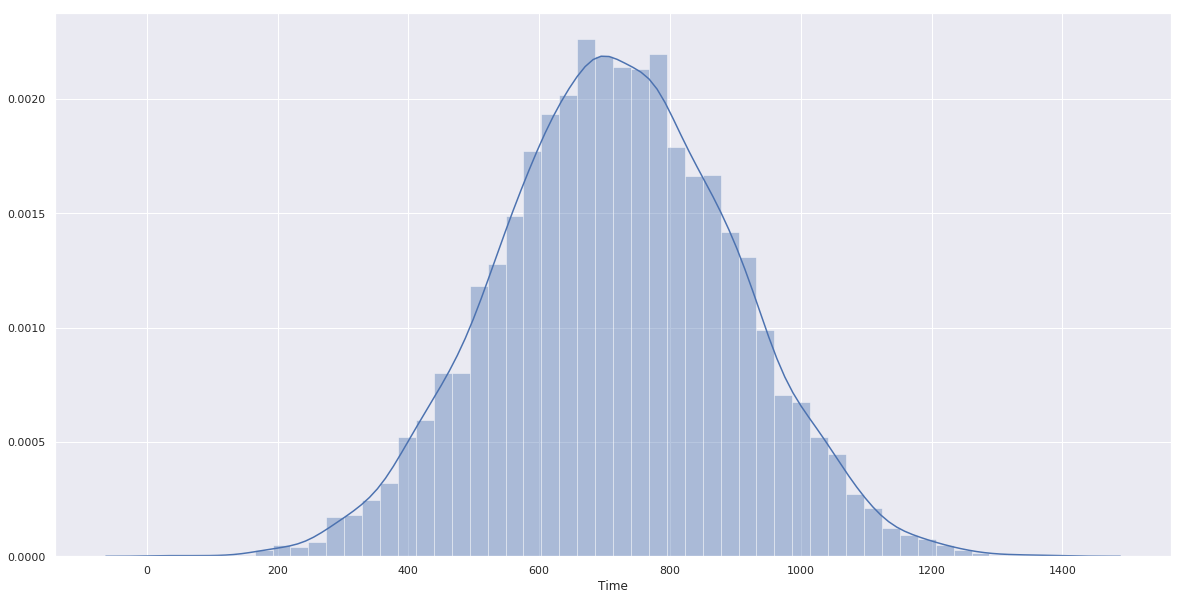

In [16]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df['Time'])

In [17]:
df.columns

Index(['Call', 'Time', 'Duration of calls', 'assigned', 'waittime'], dtype='object')

In [18]:
df['Call'].value_counts()

2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: Call, Length: 10000, dtype: int64

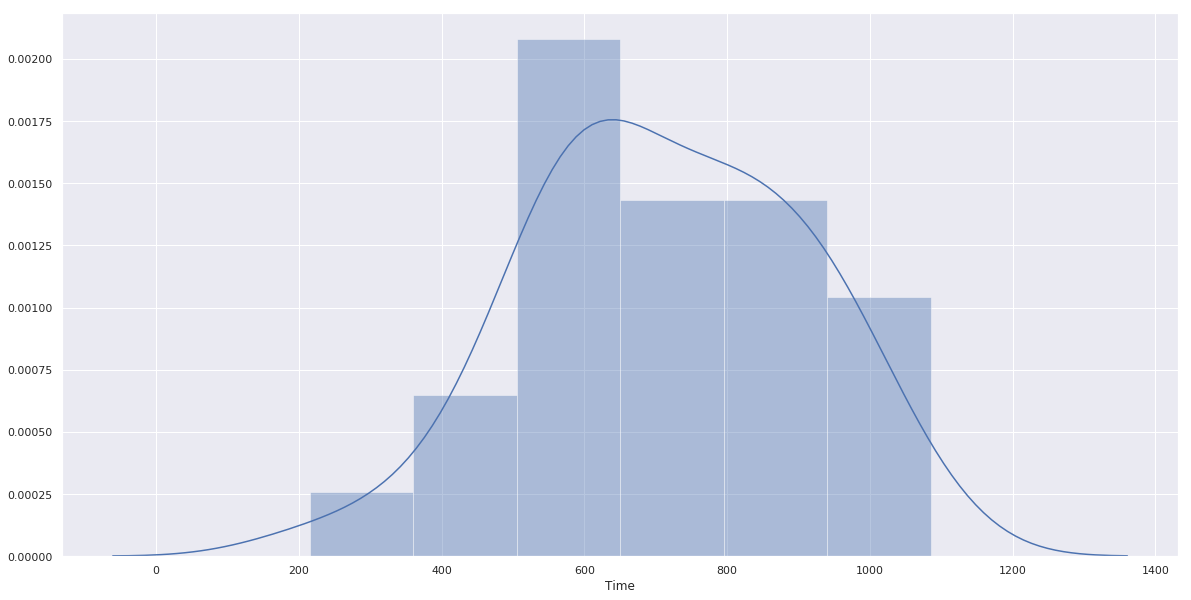

In [19]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df[df['Duration of calls']==2]['Time'])

In [20]:
df['Duration of calls'].sum()

50635

In [21]:
x = np.repeat(0,7)

In [22]:
df['Time'][0]-x

array([28, 28, 28, 28, 28, 28, 28])

In [23]:
agents = range(100)
waittime = list(np.zeros(100))
d={}

In [24]:
for number_of_callers in range(100):
    li = []
    caller = np.repeat(0,number_of_callers+1)
    index = [i for i in range(0,number_of_callers+1)]
    caller_diff = np.repeat(0,number_of_callers+1)
    data['assigned'] = [1 for i in range(10000)]
    data['waittime'] = [0 for i in range(10000)]
    for i in range(len(data['Call'])):
        caller_diff = data['Time'][i]-caller
        best_caller_diff = max(caller_diff)
        l = caller_diff == best_caller_diff
        z = [index[i] for i in range(len(l)) if l[i]==True]
        index1 = index[min(z)]
        data['assigned'][i] =  index1
        data['waittime'][i] = max(-best_caller_diff,0)
        li.append(data['waittime'][i])
        caller[index1] = caller[index1] + data['Duration of calls'][i]
    d[number_of_callers]=li
    waittime[number_of_callers] = max(data['waittime'])

In [25]:
len(waittime)

100

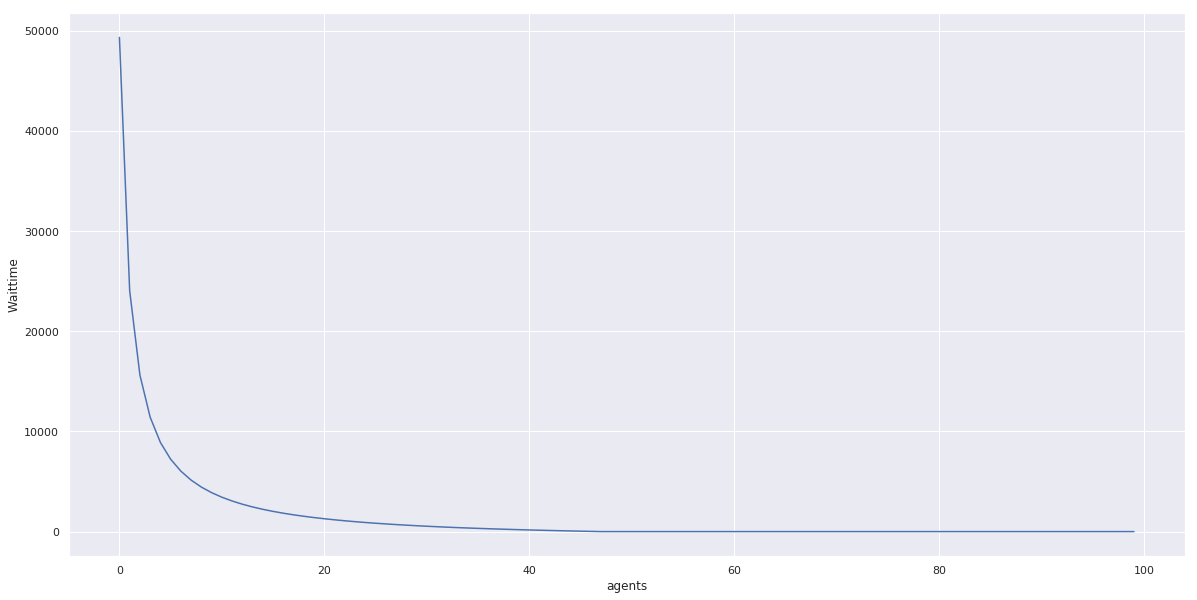

In [26]:
fig, ax = plt.subplots(figsize=a4_dims)
ax.set(xlabel='agents',ylabel='Waittime')
sns.lineplot(x=agents,y=waittime)

In [44]:
aa=[]
for i in range(100):
    temp = len(d[i])-d[i][::-1].index(0)-1
    aa.append(data['Time'][temp])

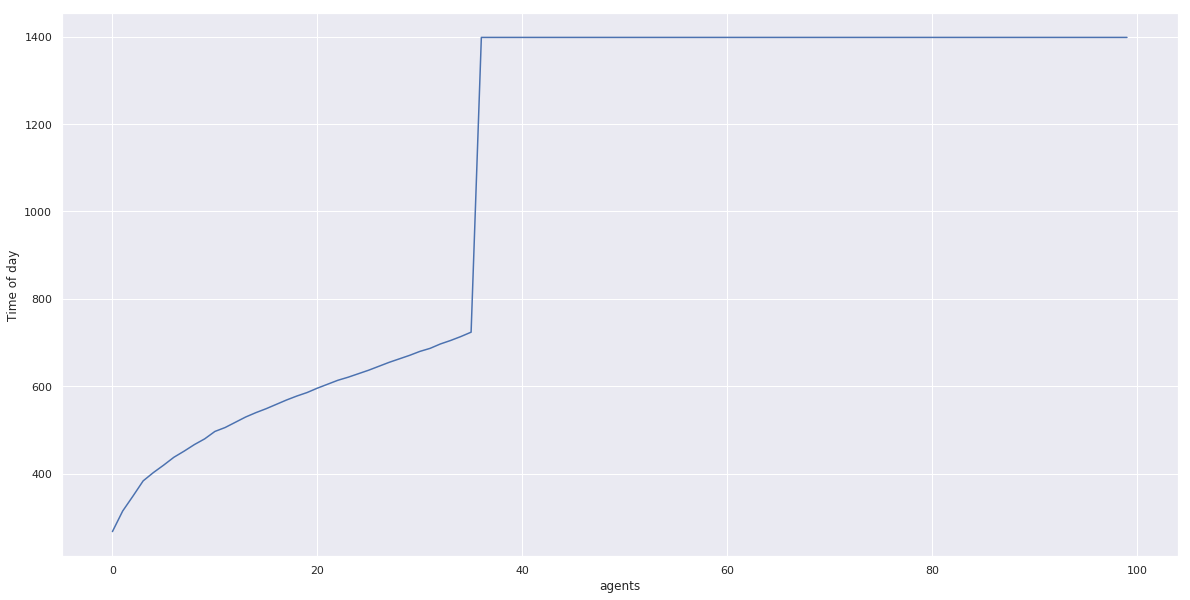

In [64]:
fig, ax = plt.subplots(figsize=a4_dims)
ax.set(xlabel='agents',ylabel='Time of day')
sns.lineplot(x=agents,y=aa)

In [69]:
print("Number of Agents Required\t:\tTime of Day")
for i in range(50):
    print(str(agents[i]+1)+"\t\t\t\t:\t"+str(int(aa[i]/60))+":"+str(int(aa[i]%60)))

Number of Agents Required	:	Time of Day
1				:	4:28
2				:	5:15
3				:	5:49
4				:	6:24
5				:	6:43
6				:	7:0
7				:	7:18
8				:	7:32
9				:	7:47
10				:	8:0
11				:	8:17
12				:	8:26
13				:	8:38
14				:	8:50
15				:	9:0
16				:	9:9
17				:	9:19
18				:	9:29
19				:	9:38
20				:	9:46
21				:	9:56
22				:	10:5
23				:	10:14
24				:	10:21
25				:	10:29
26				:	10:37
27				:	10:46
28				:	10:55
29				:	11:3
30				:	11:11
31				:	11:20
32				:	11:27
33				:	11:37
34				:	11:45
35				:	11:54
36				:	12:4
37				:	23:18
38				:	23:18
39				:	23:18
40				:	23:18
41				:	23:18
42				:	23:18
43				:	23:18
44				:	23:18
45				:	23:18
46				:	23:18
47				:	23:18
48				:	23:18
49				:	23:18
50				:	23:18
